In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset=dataset.drop(['CustomerID','Genre','Age'], axis=1)
x=dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

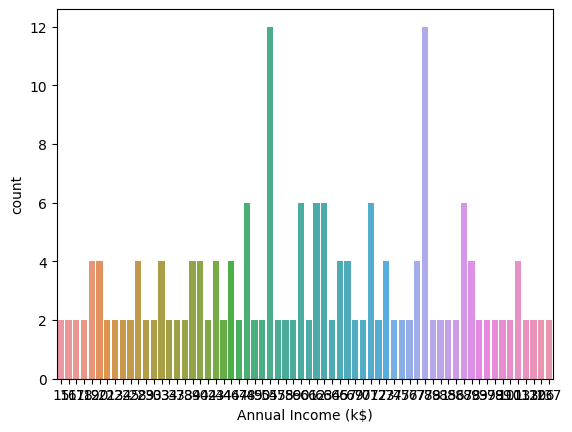

In [41]:
sns.countplot(data=x,x='Annual Income (k$)')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

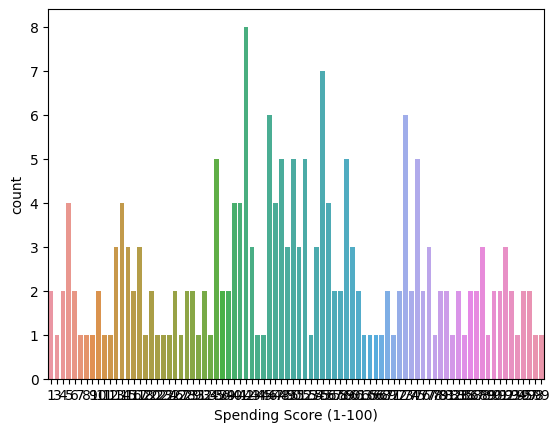

In [42]:
sns.countplot(data=x,x='Spending Score (1-100)')

In [43]:
x.corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


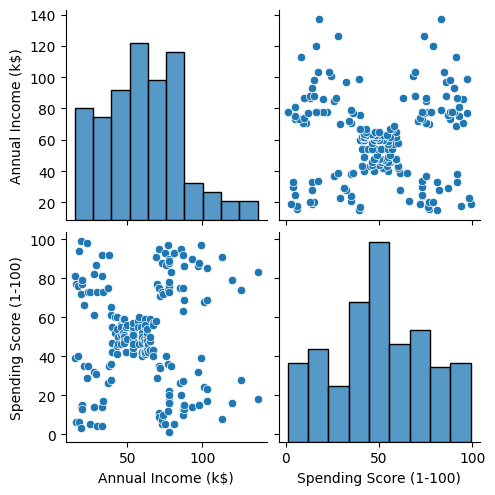

In [44]:
sns.pairplot(data=x)

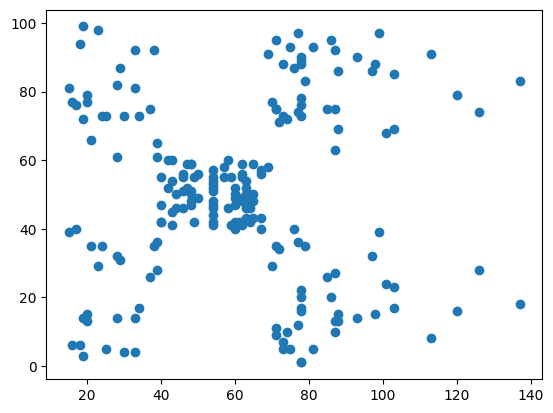

In [45]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_prepinp=sc.fit_transform(x)

Labels:  [-1  0  1  2  3]
Number of clusters estimated: 4
Number of noises estimated: 44


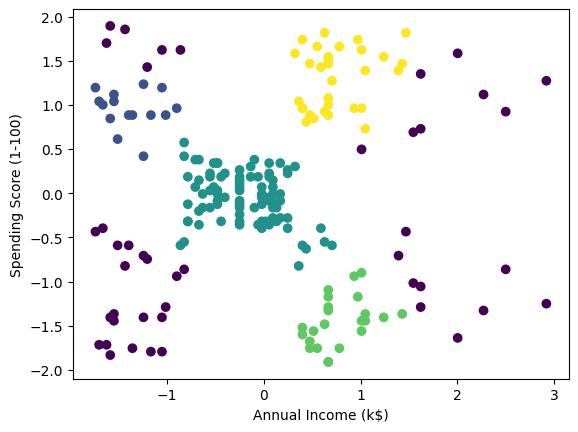

In [53]:
from sklearn.cluster import DBSCAN
dbscan_cluster=DBSCAN(eps=0.5,min_samples=15)
dbscan_cluster.fit(x_prepinp)

print('Labels: ', np.unique(dbscan_cluster.labels_) )

plt.scatter(x_prepinp[:,0],x_prepinp[:,1], c=dbscan_cluster.labels_, label=x_prepinp)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

#Number of Clusters
labels=dbscan_cluster.labels_
n_cluster=len(set(labels))-(1 if -1 in labels else 0) #(set(labels)) gives the unique set of labels # value_if_true if condition else value_if_false
print('Number of clusters estimated: %d' % n_cluster)

#Noise Identification
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Number of noises estimated: %d' % n_noise)

In [54]:
from sklearn.metrics import silhouette_score 
print('Silhouette Score: ', silhouette_score(x_prepinp,dbscan_cluster.labels_))

Silhouette Score:  0.3687238785666543
